# HW1: Data exploration and Dimensionality reduction

## OUTLINE: 

Data pre-processing, plotting and dimensionality reduction

1. Reading the file
2. Missing Values
3. Impute with scikit-learn
4. Implement imputation
5. Plotting
6. Standardization
7. Dimensionality reduction
8. Multi-Dimensional Scaling

In [ ]:

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from matplotlib.colors import ListedColormap


RSEED = 8


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

 **Algerian Forest Fires**, which is publicly available and from UCI. However, I removed and changed some parts of the dataset for the to meet my course evaluation.

The dataset includes over 200 instances that regroup real data, recorded in the past in two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

The dataset consists of several predictors (independent) variables and one target (dependent) variable, Classes. Independent variables include the date in which the data was recorded, the temperature at noon, the relative humidity, and so on.

According to the information on the data, it has ten attributes and one binary class. The brief explanation of the attributes are as follows:

- Region: The region where the data was recorded.

- Day: The day when the data was recorded.

- Month: The month when the data was recorded.

- Year: The year when the data was recorded.

- Temperature: The temperature at noon.

- RH: The relative Humidity, expressed in percentage.

- WS: The wind speed, expressed in km/h.

- Rain: The amount of rain on that day, expressed in mm.

- FFMC: The Fine Fuel Moisture Code.

- DMC: The Duff Moisture Code.

- To conclude, we have a binary class, which can be 'fire' or 'not fire'.

## *1.* Reading the file

### `Reading the dataset using pandas, the csv file called forest_fires.csv `

In [ ]:

data = pd.read_csv('dataset/forest_fires.csv')

In [ ]:
#Printing the maximum and minimun value of each column
print("Maximun Values of Each Column\n",data.max(),"\n")
print("Minimum Values of Each Column\n",data.min())

'''
min_max_value=data.agg([max,min])
print('The maximum and minimum values of each columns \n',min_max_value)
'''

Maximun Values of Each Column
 region         Sidi-Bel Abbes
day                        33
month                       9
year                     2060
Temperature              3400
RH                        620
Ws                       2102
Rain                     16.8
FFMC                     96.0
DMC                      65.9
Classes              not fire
dtype: object 

Minimum Values of Each Column
 region         Bejaia
day                 0
month               2
year             2012
Temperature      -800
RH                -39
Ws                -13
Rain              0.0
FFMC             28.6
DMC               0.7
Classes          fire
dtype: object


"\nmin_max_value=data.agg([max,min])\nprint('The maximum and minimum values of each columns \n',min_max_value)\n"

In [ ]:
# Viewing the first 5 rows of the dataset
data.head(5)

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,Classes
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,not fire


In [ ]:
# Getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       248 non-null    object 
 1   day          248 non-null    int64  
 2   month        248 non-null    int64  
 3   year         248 non-null    int64  
 4   Temperature  248 non-null    int64  
 5   RH           248 non-null    int64  
 6   Ws           248 non-null    int64  
 7   Rain         248 non-null    float64
 8   FFMC         248 non-null    float64
 9   DMC          248 non-null    float64
 10  Classes      248 non-null    object 
dtypes: float64(3), int64(6), object(2)
memory usage: 21.4+ KB


In [ ]:
# Getting the statistical summary of the dataset
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,15.854839,7.463710,2014.375000,67.620968,65.137097,42.137097,0.748387,78.009274,14.733871
std,8.949877,1.165762,10.341952,362.565858,45.821664,212.765684,1.985473,14.271061,12.316181
min,0.000000,2.000000,2012.000000,-800.000000,-39.000000,-13.000000,0.000000,28.600000,0.700000
25%,8.000000,6.000000,2012.000000,30.000000,52.000000,14.000000,0.000000,72.525000,5.800000
50%,16.000000,7.000000,2012.000000,32.000000,63.000000,15.000000,0.000000,83.700000,11.350000
75%,23.250000,8.000000,2012.000000,35.000000,74.250000,17.000000,0.500000,88.600000,20.950000
max,33.000000,9.000000,2060.000000,3400.000000,620.000000,2102.000000,16.800000,96.000000,65.900000


## *2.* Missing values

### There is no null data encoded as such. However,there are many that might look strange (maybe some values that do not make sense?). 

### `Plotting a bar plot of the 'missing' values (values that are encoded with values that do not make sense) per attribute. ` 



Invalid counts per attribute:
day: 3
month: 0
year: 13
Temperature: 5
RH: 5
Ws: 5
Rain: 0
FFMC: 0
DMC: 3


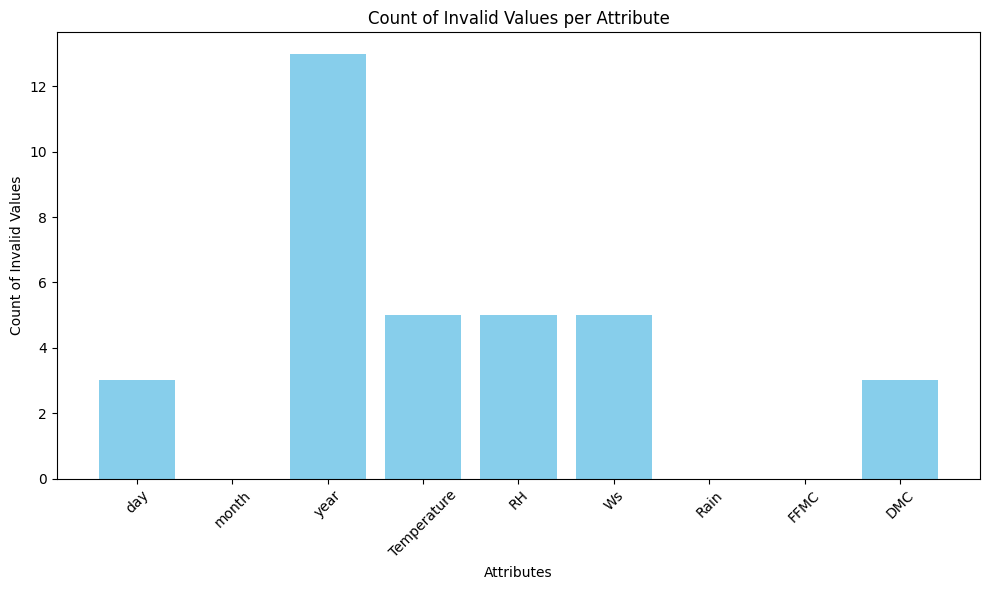

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

#Invalid criteria for each column:
#invalid_region   = ((data['region'] != "Bejaia") | data['region'] != "Sidi-Bel Abbes").sum()
#invalid_region  = (~data['region'].isin(['Bejaia', 'Sidi-Bel Abbes'])).sum()
invalid_day      = ((data['day'] < 1) | (data['day'] > 31)).sum()
invalid_month    = ((data['month'] < 1) | (data['month'] > 12)).sum()
invalid_year     = (data['year'] != 2012).sum()
invalid_temp     = ((data['Temperature'] < -50) | (data['Temperature'] > 60)).sum()  # suppose in celcius.
invalid_rh       = ((data['RH'] < 0) | (data['RH'] > 100)).sum()
invalid_ws       = ((data['Ws'] < 0) | (data['Ws'] > 200)).sum()
invalid_rain     = ((data['Rain'] < 0) | (data['Rain'] > 20)).sum()
invalid_ffmc     = ((data['FFMC'] < 18.7) | (data['FFMC'] > 96.2)).sum()
invalid_dmc      = ((data['DMC'] < 1.1) | (data['DMC'] > 291.3)).sum()
#invalid_classes  = (~data['Classes'].isin(['fire', 'not fire'])).sum()

# Store invalid counts in a dictionary
invalid_counts = {
    #'region': invalid_region,
    'day': invalid_day,
    'month': invalid_month,
    'year': invalid_year,
    'Temperature': invalid_temp,
    'RH': invalid_rh,
    'Ws': invalid_ws,
    'Rain': invalid_rain,
    'FFMC': invalid_ffmc,
    'DMC': invalid_dmc,
    #'Classes': invalid_classes
}

# Print invalid counts for reference
print("Invalid counts per attribute:")
for col, count in invalid_counts.items():
    print(f"{col}: {count}")

# Plot a bar chart of the invalid counts per attribute
plt.figure(figsize=(10, 6))
plt.bar(invalid_counts.keys(), invalid_counts.values(), color='skyblue')
plt.title("Count of Invalid Values per Attribute")
plt.xlabel("Attributes")
plt.ylabel("Count of Invalid Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### `printing one dictionary: the keys must be the features of the data dataframe, with the number of missing values for each feature as the values.`

In [ ]:


# Dictionary of missing values (only those with counts > 0)
missing_values_dict = {
    #'region': invalid_region.sum().item(),
    'day': invalid_day.sum().item(),
    'month': invalid_month.sum().item(),
    'year': invalid_year.sum().item(),
    'Temperature': invalid_temp.sum().item(),
    'RH': invalid_rh.sum().item(),
    'Ws': invalid_ws.sum().item(),
    'Rain': invalid_rain.sum().item(),
    'FFMC': invalid_ffmc.sum().item(),
    'DMC': invalid_dmc.sum().item(),
    #'Classes': invalid_classes.sum().item()
}
print("\nDictionary of Missing/Invalid Values (Feature: Count):")
print(missing_values_dict)


Dictionary of Missing/Invalid Values (Feature: Count):
{'day': 3, 'month': 0, 'year': 13, 'Temperature': 5, 'RH': 5, 'Ws': 5, 'Rain': 0, 'FFMC': 0, 'DMC': 3}


## *3.* Impute with scikit-learn

### some values  have been reported incorrectly in the dataset,  changing those values into another reasonable value, such as mean or median. 

### For the scikit-learn imputation, you can find more information [here](https://scikit-learn.org/stable/modules/impute.html), or in the recorded lab.

In [ ]:

# Step 1: Create a copy of the original dataset
data_imputed = data.copy()

# Step 2: Replace invalid values with NaN based on the criteria for each column
data_imputed.loc[(data_imputed['day'] < 1) | (data_imputed['day'] > 31), 'day'] = np.nan
data_imputed.loc[(data_imputed['month'] < 1) | (data['month'] > 12),'month'] = np.nan
data_imputed.loc[(data_imputed['year']!=2012), 'year'] = np.nan
data_imputed.loc[(data_imputed['Temperature'] < -50) | (data_imputed['Temperature']>60), 'Temperature']= np.nan
data_imputed.loc[(data_imputed['RH']< 0)| (data_imputed['RH']>100),'RH']=np.nan
data_imputed.loc[(data_imputed['Ws'] < 0) | (data_imputed['Ws'] > 200),'Ws']= np.nan
data_imputed.loc[(data_imputed['Rain'] < 0) | (data_imputed['Rain'] > 20),'Rain']=np.nan
data_imputed.loc[(data_imputed['FFMC'] < 18.7) | (data_imputed['FFMC'] > 96.2),'FFMC']=np.nan
data_imputed.loc[(data_imputed['DMC'] < 1.1) | (data_imputed['DMC'] > 291.3),'DMC']=np.nan

# Step 3: Define columns to impute (those with invalid values replaced by NaN)
columns_to_impute = ['day', 'month','year', 'Temperature', 'RH', 'Ws','Rain','FFMC','DMC']

# Step 4: Apply SimpleImputer with median strategy
df_part = data_imputed[columns_to_impute]
imputer = SimpleImputer(strategy='median')
imputed_array = imputer.fit_transform(df_part)

# Step 5: Convert imputed array back to DataFrame
df_converted = pd.DataFrame(imputed_array, columns=columns_to_impute)

# Step 6: Update the copied dataset with imputed values
data_imputed[columns_to_impute] = df_converted

# The original 'data' remains unchanged, and 'data_imputed' has imputed values

print(data_imputed.head(5))



   region  day  month    year  Temperature    RH    Ws  Rain  FFMC  DMC  \
0  Bejaia  1.0    6.0  2012.0         29.0  57.0  18.0   0.0  65.7  3.4   
1  Bejaia  2.0    6.0  2012.0         29.0  61.0  13.0   1.3  64.4  4.1   
2  Bejaia  3.0    6.0  2012.0         26.0  82.0  22.0  13.1  47.1  2.5   
3  Bejaia  4.0    6.0  2012.0         25.0  89.0  13.0   2.5  28.6  1.3   
4  Bejaia  5.0    6.0  2012.0         27.0  77.0  16.0   0.0  64.8  3.0   

    Classes  
0  not fire  
1  not fire  
2  not fire  
3  not fire  
4  not fire  


In [ ]:
 
imputer.statistics_


array([  16. ,    7. , 2012. ,   32. ,   63. ,   15. ,    0. ,   83.7,
         11.5])

In [ ]:

data_imputed.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,15.786290,7.463710,2012.0,32.129032,62.072581,15.463710,0.748387,78.009274,14.862903
std,8.765426,1.165762,0.0,3.607163,14.612497,2.760093,1.985473,14.271061,12.225042
min,1.000000,2.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,1.100000
25%,8.000000,6.000000,2012.0,30.000000,52.750000,14.000000,0.000000,72.525000,6.000000
50%,16.000000,7.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.500000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.600000,20.950000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000


In [ ]:

data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,15.854839,7.463710,2014.375000,67.620968,65.137097,42.137097,0.748387,78.009274,14.733871
std,8.949877,1.165762,10.341952,362.565858,45.821664,212.765684,1.985473,14.271061,12.316181
min,0.000000,2.000000,2012.000000,-800.000000,-39.000000,-13.000000,0.000000,28.600000,0.700000
25%,8.000000,6.000000,2012.000000,30.000000,52.000000,14.000000,0.000000,72.525000,5.800000
50%,16.000000,7.000000,2012.000000,32.000000,63.000000,15.000000,0.000000,83.700000,11.350000
75%,23.250000,8.000000,2012.000000,35.000000,74.250000,17.000000,0.500000,88.600000,20.950000
max,33.000000,9.000000,2060.000000,3400.000000,620.000000,2102.000000,16.800000,96.000000,65.900000


## *4.*  imputation:

### `function that changes the invalid (or nan) values to the median of the attribute of a dataframe. `

In [ ]:
def imputation(df, columns_to_imputed):
    # Step 1: Create a copy of the dataframe to avoid modifying the original
    df_imputed = df.copy() 
    # Step 2: Iterate over each column to handle invalid values and impute
    for col in columns_to_imputed:
        # Replace invalid values with NaN based on predefined criteria
        if col == 'day':
            mask = (df_imputed[col] < 1) | (df_imputed[col] > 31)
        elif col=='month':
            mask=(df_imputed[col] < 1) | (df_imputed[col] > 12)
        elif col == 'year':
            mask = df_imputed[col] != 2012
        elif col == 'Temperature':
            mask = (df_imputed[col] < -50) | (df_imputed[col] > 60)
        elif col == 'RH':
            mask = (df_imputed[col] < 0) | (df_imputed[col] > 100)
        elif col == 'Ws':
            mask = (df_imputed[col] < 0) | (df_imputed[col] > 200)
        elif col=='Rain':
            mask=(df_imputed[col]<0) | (df_imputed[col]>200)
        elif col=='FFMC':
            mask=(df_imputed[col]< 18.7) | (df_imputed[col] > 96.2)
        elif col == 'DMC':
            mask = (df_imputed[col] < 1.1) | (df_imputed[col] > 291.3)
        else:
            # If the column is not in the predefined criteria, skip replacing invalid values
            mask = pd.Series(False, index=df_imputed.index)
        
        df_imputed.loc[mask, col] = np.nan
        
        # Step 3: Replace NaNs with the median of the column
        median_val = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(median_val) 
        '''
        median_val = df_imputed[col].median()
        df_imputed[col].fillna(median_val, inplace=True)
        '''
    return df_imputed

In [15]:
columns = ['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC']
data_1 = imputation(data, columns)

In [ ]:


columns_to_check = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC']

data_imputed_to_check = data_imputed[columns_to_check]
data_1_to_check = data_1[columns_to_check]

try:
    np.testing.assert_allclose(data_imputed_to_check.values, data_1_to_check.values)
    print("result: equal")
except:
    print("result: not equal")


result: equal


In [ ]:

data_1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,15.786290,7.463710,2012.0,32.129032,62.072581,15.463710,0.748387,78.009274,14.862903
std,8.765426,1.165762,0.0,3.607163,14.612497,2.760093,1.985473,14.271061,12.225042
min,1.000000,2.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,1.100000
25%,8.000000,6.000000,2012.0,30.000000,52.750000,14.000000,0.000000,72.525000,6.000000
50%,16.000000,7.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.500000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.600000,20.950000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000


In [ ]:

data_imputed.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,15.786290,7.463710,2012.0,32.129032,62.072581,15.463710,0.748387,78.009274,14.862903
std,8.765426,1.165762,0.0,3.607163,14.612497,2.760093,1.985473,14.271061,12.225042
min,1.000000,2.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,1.100000
25%,8.000000,6.000000,2012.0,30.000000,52.750000,14.000000,0.000000,72.525000,6.000000
50%,16.000000,7.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.500000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.600000,20.950000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000


## *5.* Plotting



## a. In this task we will explore the attribute 'Temperature' with plotting. 

### ` Create 1 figure with a set of 3 subplots. `


#### - `In the 1st subplot create a boxplot for the attribute Temperature.`


#### - `In the 2nd subplot create a histogram for the attribute Temperature.`


#### - `In the 3rd subplot creating a scatterplot for the attributes Temperature and RH, colored by the attribute 'Classes' (add a legend to identify color - class label pairs).`
`The plots  have titles, the figsize should be big enough (for example figsize=(16,9)).'`

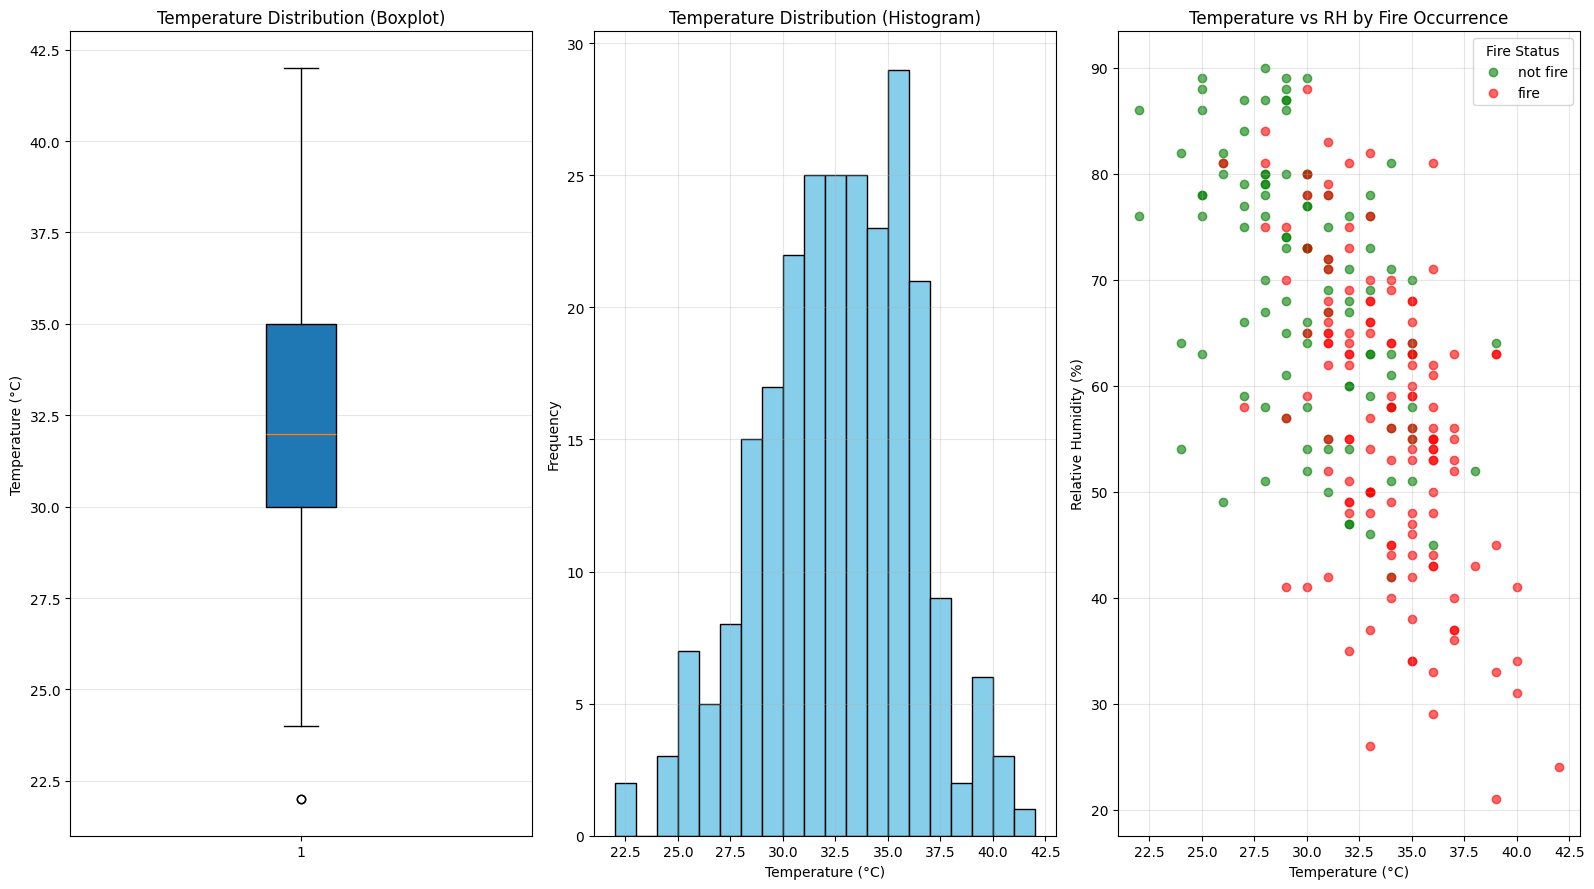

In [ ]:

import matplotlib.pyplot as plt

# Create figure with 3 subplots
plt.figure(figsize=(16, 9))

# 1. Boxplot (Left Subplot)
plt.subplot(1, 3, 1)
plt.boxplot(data_imputed['Temperature'], vert=True, patch_artist=True)
plt.title('Temperature Distribution (Boxplot)')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y', alpha=0.3)

# 2. Histogram (Middle Subplot)

plt.subplot(1, 3, 2)
plt.hist(data_imputed['Temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution (Histogram)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# 3. Scatterplot (Right Subplot)

plt.subplot(1, 3, 3)

# Create color mapping for classes
colors = {'not fire': 'green', 'fire': 'red'}  # Replace with actual class labels if different

# Plot each class separately
for class_label, color in colors.items():
    subset = data_imputed[data_imputed['Classes'] == class_label]
    plt.scatter(subset['Temperature'], 
                subset['RH'],
                c=color,
                label=class_label,
                alpha=0.6)

plt.title('Temperature vs RH by Fire Occurrence')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(title='Fire Status')
plt.grid(alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()





## b.	RH by class 

### ` Plotting the 'RH' attribute in groups of 5% in relation to the class ('Classes').`

Information about the cut function [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']


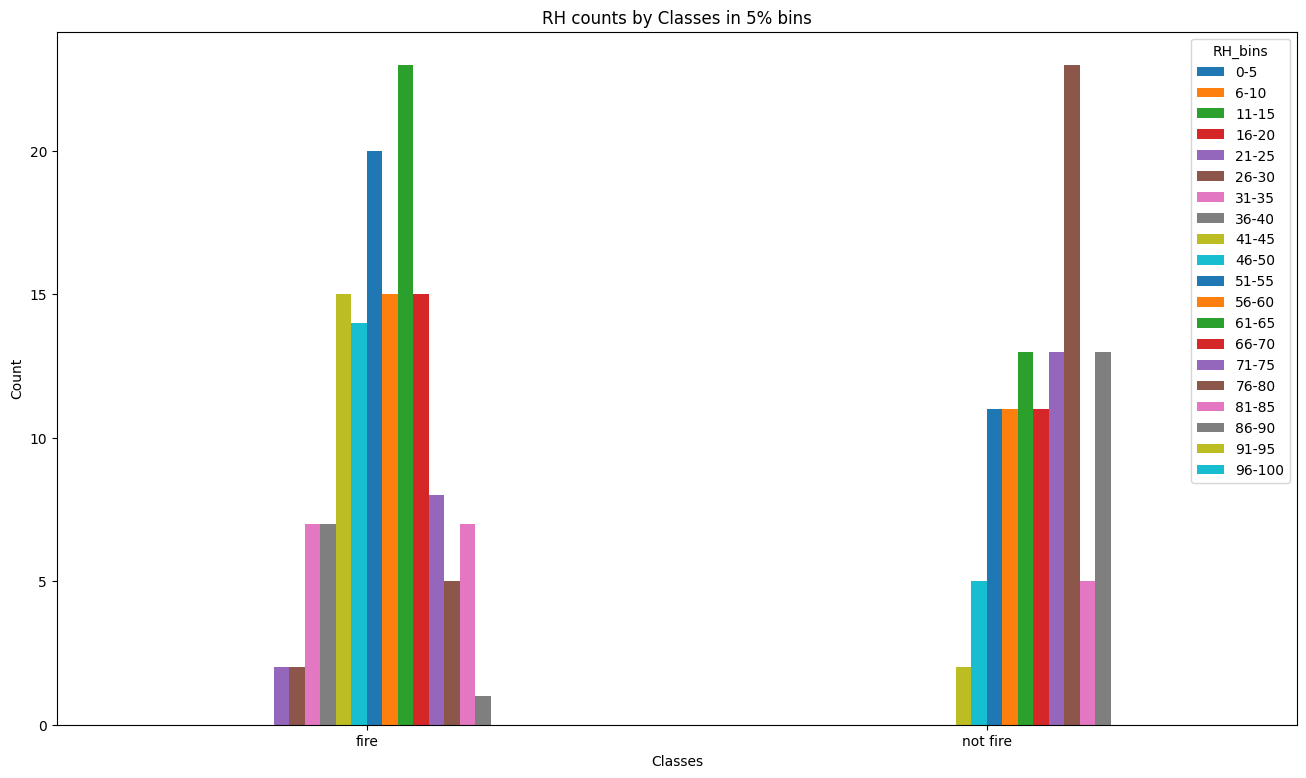

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create RH_bins column in data_imputed
# Define bin edges from 0 to 100 in steps of 5
bins = list(range(0, 101, 5))
# Create custom labels: for the first bin use "0-5", then "6-10", "11-15", etc.
label = [f"{bins[i]}-{bins[i+1]}" if i == 0 else f"{bins[i]+1}-{bins[i+1]}" for i in range(len(bins)-1)]
print(label)

# Use pd.cut to bin the RH values. Setting right=True includes the right edge; include_lowest ensures 0 is included.
data_imputed['RH_bins'] = pd.cut(data_imputed['RH'], bins=bins, labels=label, right=True, include_lowest=True)

# Step 2: Create a dataframe with counts of each RH_bins value by 'Classes'
RH_by_class = data_imputed.groupby('Classes')['RH_bins'].value_counts().unstack().fillna(0)

# Step 3: Plot a barplot for RH_by_class using pandas plotting
ax = RH_by_class.plot(kind='bar', figsize=(16, 9), title='RH counts by Classes in 5% bins')
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Step 4: Drop the RH_bins column from data_imputed
data_imputed.drop(columns=['RH_bins'], inplace=True)





In [ ]:

data_imputed.head()

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,Classes
0,Bejaia,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,not fire
1,Bejaia,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,not fire
2,Bejaia,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,not fire
3,Bejaia,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,not fire
4,Bejaia,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,not fire


Considering temperature, relative humidity, wind speed, and other factors in the dataset, which months historically have the highest probability of forest fires?  How does fire probability vary throughout the year?

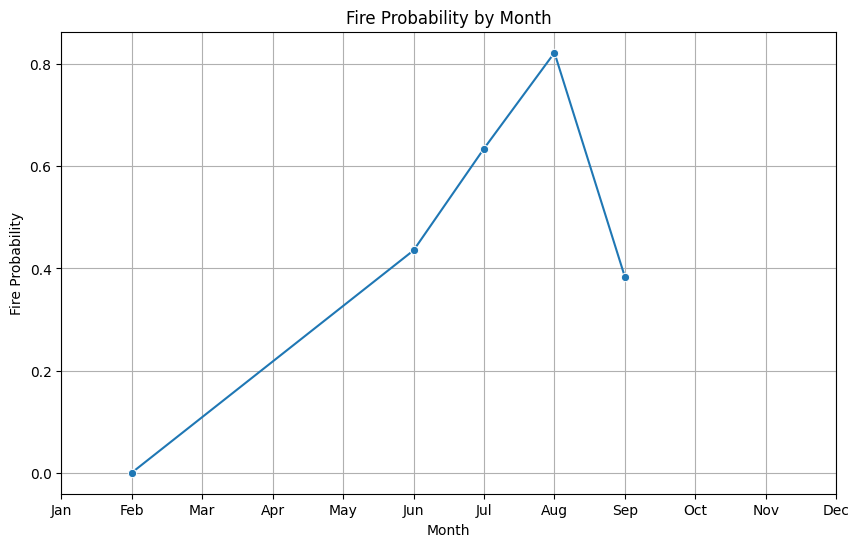

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
my_own_df=data_imputed.copy()

# Group by month and fire occurrence, then count occurrences
fire_counts = my_own_df.groupby(['month', 'Classes']).size().unstack(fill_value=0)

# Calculate total occurrences per month
fire_counts['Total'] = fire_counts['fire'] + fire_counts['not fire']

# Calculate fire probability for each month
fire_counts['Fire Probability'] = fire_counts['fire'] / fire_counts['Total']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=fire_counts.index, y='Fire Probability', data=fire_counts, marker='o')

plt.title('Fire Probability by Month')
plt.xlabel('Month')
plt.ylabel('Fire Probability')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.grid(True)
plt.show()

The line plot shows the fire probability for each month, calculated from historical data. Peaks in the plot indicate the months with the highest fire risk.  These are the months most likely to experience fires in the future, assuming similar conditions.  Further analysis could explore how temperature, RH, and WS contribute to this monthly variation in fire risk.

## *6.* Standardization

### Standardization transforms data to have a mean of zero and a standard deviation of 1. 

### It is a crucial step before performing PCA, since we are interested in the components that maximize the variance. 





### `Task: Standardize the data_imputed dataset. You can use sklearn.  Store in a variable called 'y' the attribute 'Classes' (your class)`
### NOTE! Classes is the class of the dataset indicating if there was a fire or not. As we discussed in the lab, the class should not be included in the standardization. Make sure not to have it in the data_standardized dataset.
### NOTE! The region cannot be standardized either, since it is categorical. Make sure not to have it in the data_standardized dataset.

In [ ]:


#y = pd.Series() # change this
#data_standardized = pd.DataFrame() # change this 
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features from non-standardized columns
X_to_scale = data_imputed.drop(columns=['Classes', 'region'])

# Step 2: Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_to_scale)

# Step 3 & 4: Create DataFrame with original column names
data_standardized = pd.DataFrame(scaled_data, columns=X_to_scale.columns)

# Step 5: Store class labels separately
y = data_imputed['Classes'].copy()

print("Standardized columns:", data_standardized.columns.tolist())
print(data_standardized.mean())
print("Class variable shape:", y.shape)
  


Standardized columns: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC']
day           -8.237139e-17
month         -1.181850e-16
year           0.000000e+00
Temperature   -9.598057e-16
RH             1.432546e-16
Ws             2.865092e-16
Rain          -7.162729e-18
FFMC           5.873438e-16
DMC           -2.865092e-17
dtype: float64
Class variable shape: (248,)


In [ ]:

data_standardized.mean()

day           -8.237139e-17
month         -1.181850e-16
year           0.000000e+00
Temperature   -9.598057e-16
RH             1.432546e-16
Ws             2.865092e-16
Rain          -7.162729e-18
FFMC           5.873438e-16
DMC           -2.865092e-17
dtype: float64

In [ ]:

y.head(5)

0    not fire
1    not fire
2    not fire
3    not fire
4    not fire
Name: Classes, dtype: object

## *7.* Dimensionality Reduction

## a. PCA

### ` Reducing the dimensionality of the standardized dataset in 2 Principal Components, with Principal Component Analysis. Printing the information obtained by the following attributes of the pca object: explained_variance_ratio and components_. `

In [ ]:

#explained_variance_ratio =  None #change this
#df_principal_components = pd.DataFrame() #change this
from sklearn.decomposition import PCA

# Step 1: Initialize and fit PCA
pca = PCA(n_components=2, random_state=9)
principal_components = pca.fit_transform(data_standardized)

# Step 2: Store explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 3: Create components DataFrame
df_principal_components = pd.DataFrame(
    pca.components_,
    columns=data_standardized.columns,
    index=['PC1', 'PC2']
)

# Print results
print("Explained Variance Ratio:", explained_variance_ratio)
print("\nPrincipal Components:")
print(df_principal_components)



Explained Variance Ratio: [0.38840666 0.15580428]

Principal Components:
          day     month          year  Temperature        RH        Ws  \
PC1  0.198571  0.014159 -0.000000e+00     0.460632 -0.426708 -0.174346   
PC2  0.682531  0.051744  1.110223e-16    -0.198872  0.203701  0.514305   

         Rain      FFMC       DMC  
PC1 -0.326285  0.509236  0.412223  
PC2  0.090706 -0.023503  0.420880  


In [27]:
df_principal_components

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC
PC1,0.198571,0.014159,-0.000000e+00,0.460632,-0.426708,-0.174346,-0.326285,0.509236,0.412223
PC2,0.682531,0.051744,1.110223e-16,-0.198872,0.203701,0.514305,0.090706,-0.023503,0.420880


In [28]:
explained_variance_ratio

array([0.38840666, 0.15580428])

## b. 	Which attribute contributes the most?



In [ ]:


#attribute_contributing_the_most =  " ? "
attribute_contributing_the_most = df_principal_components.loc['PC1'].abs().idxmax()
print("Attribute contributing the most to PC1:", attribute_contributing_the_most)

Attribute contributing the most to PC1: FFMC


In [ ]:

attribute_contributing_the_most

'FFMC'

## 8.  Multi-Dimensional Scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities, or planets at a particular point in time, or the similarity among groups of people (voters, patients etc). 


focus is on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform.  

Please check the sklearn page for MDS to be able to implement the above tasks: [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). Make sure you understand the parameters of fit_transform and how you could use them for the tasks!


## a. Multi-Dimensional Scaling, task a

###   `  MDS on the data_standardized with n_components=2 and dissimilarity='euclidean'. Plot the 2 resulting coordinates (in a scatterplot) with colors representative of the class labels.`





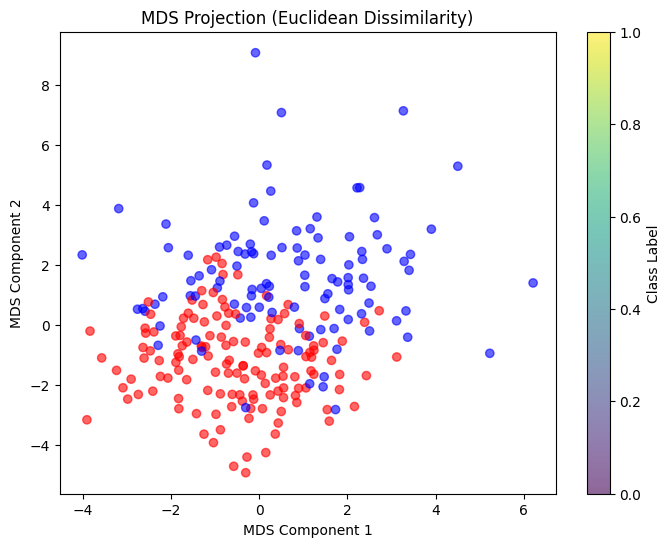

In [ ]:


#X_2d_a = np.zeros([2, 2]) # change this assignment on X_2d_a, but keep X_2d_a as the name of the resulting MDS numpy array
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Step 1: Initialize MDS with Euclidean dissimilarity
mds = MDS(n_components=2, random_state=9, dissimilarity='euclidean')

# Step 2: Fit and transform the standardized data
X_2d_a = mds.fit_transform(data_standardized)  # Replace placeholder array
color_mapping = {'fire': 'red', 'not fire': 'blue'}
colors = y.map(color_mapping)

# Step 3: Plot the MDS projection with class colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d_a[:, 0], X_2d_a[:, 1], c=colors, alpha=0.6)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS Projection (Euclidean Dissimilarity)')
plt.colorbar(scatter, label='Class Label')
plt.show()

In [32]:
X_2d_a

array([[ 8.91754288e-01,  2.13718379e+00],
       [ 2.72403578e-01,  2.31992564e+00],
       [ 3.26894935e+00,  7.14479395e+00],
       [ 2.27921079e+00,  4.58151273e+00],
       [ 1.39351781e+00,  2.18539882e+00],
       [ 1.67281247e-01,  9.74518949e-01],
       [-1.24269779e+00,  9.65688222e-02],
       [ 6.55992330e-01,  6.75055985e-01],
       [ 2.04749855e+00,  2.94115319e+00],
       [ 1.03387251e+00,  1.65586096e+00],
       [ 2.67918466e-01,  2.01672450e-01],
       [ 2.72166462e+00,  4.70189355e-01],
       [ 3.39913026e+00,  1.81963479e+00],
       [ 2.53550858e+00,  1.28733269e+00],
       [ 2.32641084e+00,  2.44722115e+00],
       [ 2.67839742e+00,  3.00597125e+00],
       [ 2.89796160e+00,  2.53849134e+00],
       [ 1.65209251e+00,  1.54230055e+00],
       [ 9.12833980e-01, -1.25476316e-01],
       [ 2.02792966e+00,  1.16820655e+00],
       [ 1.48649479e+00,  2.93706904e-01],
       [ 1.39673352e+00, -1.60503208e-01],
       [ 1.45154383e+00, -5.96138469e-01],
       [ 1.

## b. Multi-Dimensional Scaling, task b.

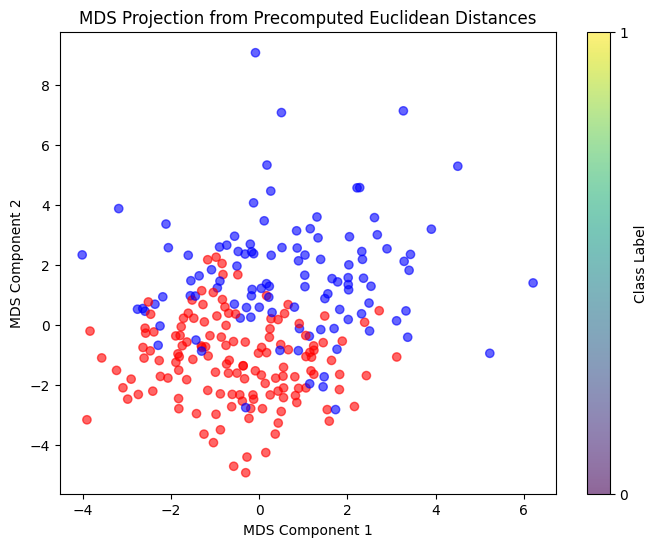

In [ ]:


#X_2d_b = np.zeros([2, 2]) # change this assignment on X_2d_b, but keep X_2d_b as the name of the resulting MDS numpy array
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Step 1: Compute pairwise Euclidean distance matrix
distances = euclidean_distances(data_standardized)

# Step 2: Initialize MDS with precomputed distances
mds = MDS(n_components=2, random_state=9, dissimilarity='precomputed')

# Step 3: Apply MDS to the distance matrix
X_2d_b = mds.fit_transform(distances)

# Step 4: Map class labels to colors (replace 'Classes' with your actual class labels variable)
color_mapping = {'fire': 'red', 'not fire': 'blue'}  # Explicit color mapping
colors = y.map(color_mapping)  # Ensure 'Classes' is your class labels array

# Step 5: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d_b[:, 0], X_2d_b[:, 1], c=colors, alpha=0.6)  # Use mapped colors
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS Projection from Precomputed Euclidean Distances')
plt.colorbar(scatter, label='Class Label', ticks=[0, 1])  # Adjust ticks if needed
plt.show()


In [ ]:

try:
    np.testing.assert_allclose(X_2d_b, X_2d_a, atol=0.00001)
    print("result: equal")
except:
    print("result: not equal")


result: equal
